## Practice Questions

This notebook contains practise questions for the assess coursework on the 19th of March. I will upload some model answers in a later lecture. If you can answer all of these questions, then you shouldn't have too much trouble in the coursework.

Please use the ‘litho_log’ data available in the data folder of this repository to complete these exercises.

### Exercise 1 (Approx. 15 mins)

You have been given some data that contains a large number of observations of downhole logs and the name of the lithologies associated with the log response.
 - 'DEPTH_WMSF': the depth of the measurement below seafloor 
 - 'HCGR': Total gamma ray counts 
 - 'HFK': Potassium counts 
 - 'HTHO': Thorium counts 
 - 'HURA': Uranium counts 
 - 'IDPH': Deep Phasor Dual Induction–Spherically Focused Resistivity 
 - 'IMPH': Medium Phasor Dual Induction–Spherically Focused Resistivity 
 - 'SFLU': Shallow Phasor Dual Induction–Spherically Focused Resistivity 
 - 'lithology': our target value, a string representing the name of the lithology
 
Using a Markdown cell, describe the steps that you would take to clean this data and prepare it for machine learning analysis.

### Write your answer here (in this Markdown cell)

1. Drop duplicates from the dataset
2. Split into target variable lithology and everything else
3. Encode target variable to convert from strings to numbers
5. Do a train-test split on the subsets containing target variable and everything else
4. Use anonymous functions/conditionals to drop outliers from specific columns in the dataset
6. Make a pipeline for data preparation with the following steps: 
    - Firstly impute missing values NaNs with a given strategy - mean?
    - Then I would standardise the data by scaling it with a MinMax or a Standard Scaler

time taken : 5 minutes

### Exercise 2 (25 minutes)

Load the data set and drop any duplicates you find.

Then answer the following questions:

 - What is the distribution of the lithologies in this dataset?
 - What is the average depth of the interbedded clay and mud?
 - Among the samples found at or below 400m (below seafloor), what are the characteristics of the samples with the five highest Uranium counts?

,DEPTH_WMSF,HCGR,HFK,HTHO,HURA,IDPH,IMPH,SFLU,lithology
2656,432.9040,36.3385,1.1301,5.0357,5.3518,1.2467,1.1140,0.6402,Marl
2657,433.0564,40.7457,1.2416,5.7963,5.1878,1.2465,1.1150,0.6592,Marl
2659,433.3612,41.2251,1.2359,5.9830,5.0735,1.2500,1.1159,0.6541,Marl
2655,432.7516,34.8786,1.0104,5.2683,4.9194,1.2480,1.1136,0.6050,Marl
3821,783.8812,42.5650,1.0508,7.4969,4.9164,1.6550,1.4932,0.9354,Sandy Mud
...,...,...,...,...,...,...,...,...,...
3609,666.0760,7.5719,0.1156,1.7510,0.3751,0.5096,0.3633,0.2982,Sandy Mud
3608,665.9236,7.8863,0.1173,1.8418,0.3718,0.4824,0.3355,0.3569,Sandy Mud
3602,665.0092,10.1429,0.2828,1.5968,0.3642,0.5397,0.3418,0.2803,Sandy Mud
3603,665.1616,9.1622,0.2776,1.3127,0.2798,0.5008,0.3059,0.3190,Sandy Mud


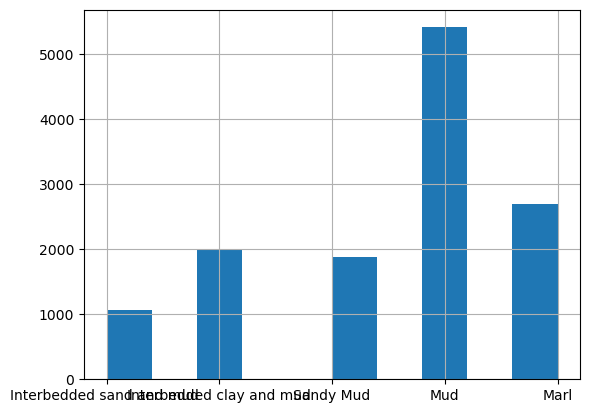

In [10]:
import numpy as np
import pandas as pd

data = pd.read_csv('Data/litho_log_data.csv')

data.drop_duplicates()

data['lithology'].hist()
#Shows distribution: around 1000 interbedded sand and mud, 2000 interbedded clay and mud, 1900 sandy mud, 5700 mud, 3600 Marl

clay_and_mud = data[(data['lithology'] == 'Interbedded clay and mud')] #Make subset of data with just clay and mud

clay_and_mud.describe()
# Read off mean depth_WMFF = 57.30 M. 

data_below_seafloor = data[(data['DEPTH_WMSF'] >= 400)] #Make subset of data with just deep samples

data_below_seafloor.sort_values(by="HURA", ascending= False) #Sort by uranium counts so I can see top 5 easily. 

#Characteristics: 4/5 are Marls, One is a Sandy Mud. 4/5 were at 432-433.4m depth range. They also have high Thorium counts above 5. As well as high potassium counts. 

# Time taken: 18 minutes

- Shows distribution: around 1000 interbedded sand and mud, 2000 interbedded clay and mud, 1900 sandy mud, 5700 mud, 3600 Marl
- mean depth_WMFF = 57.30 M
- Characteristics: 4/5 are Marls, One is a Sandy Mud. 4/5 were at 432-433.4m depth range. They also have high Thorium counts above 5. As well as high potassium counts

### Exercise 3.1 (10 minutes)

Using the steps you outlined in Exercise 1, split this dataset into a training set and a testing set (with reasonable names). 

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y = data['lithology'] #Target Variable
y = encoder.fit_transform(y)
X = data.drop(columns='lithology') #everything else

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
#I made the train size 70%, usign 30% of data for testing. Random state is 42 so its the same every time you run it. 

#Time taken: 5 minutes

### Exercise 3.2 (20 minutes)

Examine the training set. Are there any missing or unusual values in any of the columns? What are these values and in which columns can they be found? Use a Markdown cell to describe your findings.

count    9107.000000
mean      547.157005
std      2236.355653
min         0.091500
25%         0.632350
50%         0.752800
75%         1.075500
max      9700.000000
Name: SFLU, dtype: float64

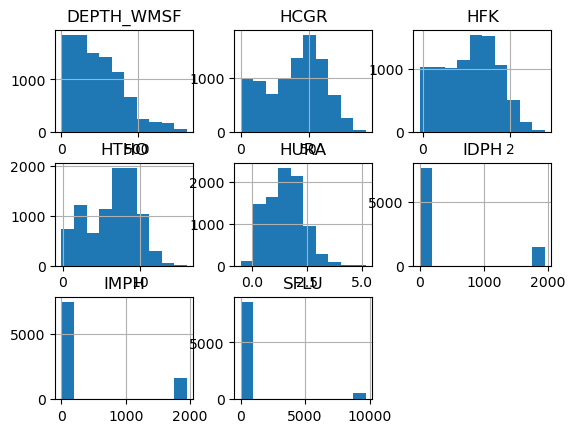

In [44]:
# There will be no unusual values in the y_train because it's encoded category names
import matplotlib.pyplot as plt

X.isna().sum()

X_train.hist()

X_train['IDPH'].describe()
X_train['IMPH'].describe()
X_train['SFLU'].describe()


- There are 9 missing HCGR values, 7 missing HFK values, 9 missing HTHO values, 3 missing HURA values, 3 missing IDPH values, 10 missing IMPH values and 4 missing SFLU values
- There are a few columns with weird histograms: HCGR, IDPH 2, IMPH and SPLU (and HTSO is also a bit funky)
- HCGR shows two peaks, IDPH has a strongly bimodal distribution, with most samples around 1 and a very small portion around 1800, the same pattern is reflected for IMPH and SPLU.
- For HCGR, the mean is 300, but the maximum value is 1900 and the standard deviation is 700. strongly suggests values towards 1900 are outliers. Same for IMPH
- For SFLU, the mean is 547, the maximum value is 9700 but 75% of samples are at or below value of 1.07. The standard devation is 2236. Also likely outliers.

Ask owner of data for clarification

Time taken: 20 mins


## Exercise 3.3 (10 minutes)

Replace any unusual values with `np.nan`. 

In [47]:
X_train['HCGR'].apply(lambda x: np.nan if (x>1500) else x)
X_train['IMPH'].apply(lambda x: np.nan if (x>1500) else x)
X_train['SFLU'].apply(lambda x: np.nan if (x>2236) else x)

X_train['SFLU'].describe()

count    9107.000000
mean      547.157005
std      2236.355653
min         0.091500
25%         0.632350
50%         0.752800
75%         1.075500
max      9700.000000
Name: SFLU, dtype: float64

## Exercise 4 (30 mins)

Create a pipeline with an `Imputer`, a `Scaler`, and a `DecisionTreeClassifier`. Set the `random_state` of the `DecisionTreeClassifier` to 42.

Create and run a RandomizedSearchCV on three hyperparameters of your choice using `accuracy` as the metric of choice (use `n_iter = 20`). Explain what varying each of your selected hyperparameters will do to your model.

Print out the accuracy and parameters of your best model.

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

my_pipeline =Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier())
])

my_pipeline.get_params()

param_distribs = [
    {'classifier__max_depth': randint(low=1, high=10), 
     'imputer__strategy': ["mean", 'most_frequent'],
     'classifier__max_features': randint(low=1, high=5)}
  ]

rnd_search = RandomizedSearchCV(my_pipeline, param_distributions=param_distribs,
                                n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42, verbose=5)

rnd_search.fit(X_train, y_train)

rnd_search.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[CV 1/5] END classifier__max_depth=8, classifier__max_features=1, imputer__strategy=mean;, score=0.758 total time=   0.0s
[CV 2/5] END classifier__max_depth=8, classifier__max_features=1, imputer__strategy=mean;, score=0.762 total time=   0.0s
[CV 3/5] END classifier__max_depth=8, classifier__max_features=1, imputer__strategy=mean;, score=0.784 total time=   0.0s
[CV 1/5] END classifier__max_depth=7, classifier__max_features=4, imputer__strategy=mean;, score=0.845 total time=   0.1s
[CV 4/5] END classifier__max_depth=7, classifier__max_features=4, imputer__strategy=mean;, score=0.847 total time=   0.1s
[CV 2/5] END classifier__max_depth=7, classifier__max_features=4, imputer__strategy=mean;, score=0.853 total time=   0.1s
[CV 3/5] END classifier__max_depth=7, classifier__max_features=4, imputer__strategy=mean;, score=0.806 total time=   0.1s
[CV 5/5] END classifier__max_depth=7, classifier__max_features=4, imputer__strategy=mean;, score=0.844 total time=   0.1s
[CV 4/5] END classifier_

{'classifier__max_depth': 9,
 'classifier__max_features': 4,
 'imputer__strategy': 'most_frequent'}

The best imputer strategy is replacing NaNs with the most frequently appearing values. 
The ideal max features for the decision tree is 4. This means that the tree will take 5 features into consideration when looking for the best True/False question to ask. This can greatly improve time taken to compute. 
The ideal max depth of the decision tree is 9.  This means that the tree stops asking TRUE/FALSE questions after eight levels regardless of the buckets being pure or not. If this parameter is not tuned, algorithm will keep going until all bucket are pure and the GINI is zero. This will result in an overfitted model. 

## Exercise 5 (10 mins)

Explain why accuracy may not be the best metric for assessing the performance of a classifier model.

Describe three other classification metrics and the scenarios in which they would be useful.

- Accuracy is a metric that describes the ratio of true positives + true negatives to total predictions (i.e. TN + TP + FN + FP)
- If the dataset is imbalanced, for example there are a lot more negatives than positives, this may give an inflated sense of model performance.
- This scoring metric is best used when the positive and negatives are well-balanced in the dataset.

1. Recall. it's the ability to detect occurences of a class. It's calculated by TP / TP + FN
    - useful when you want to identify as many occurences of a class as possible. In a scenario where identifying false positives has negligible importance compared to catching true positives, this is a good metric. An example would be cancer diagnosis. 

2. Precision. Measures the ability to detect true positives. TP/ TP + FP . But scoring amits ability to detect true negatives. Use when it's important to identify the positive class. An application I can think of is financial fraud detection - if a model gives to many false positives, the bank will freeze too many accounts, so this scoring would work well. 

3. F1 score is the harmonic mean of precision and recall, calculated by (precision*recall)/(precision+recall) and will be influenced more heavily by whichever one is lower.
It is best used when you might not know the dataset or the application so well and you need something generic to compare. 
